In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [295]:
df = pd.read_csv('player_stats.csv', encoding='latin-1')
df.head()

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


In [296]:
# Belirli sütunları çıkartma
drop_column = ['player','country','club','height','weight','marking','gk_positioning','gk_diving','gk_handling','gk_kicking','gk_reflexes','slide_tackle','stand_tackle','aggression','att_position','interceptions','composure','acceleration','agility','jumping','curve','fk_acc','volleys','penalties','age','value'] 
df = df.drop(columns=drop_column)
df

,ball_control,dribbling,reactions,vision,crossing,short_pass,long_pass,stamina,strength,balance,sprint_speed,heading,shot_power,finishing,long_shots
0,55,43,68,30,33,64,49,55,86,40,52,64,54,30,31
1,69,70,70,64,60,63,63,87,81,42,67,54,60,64,68
2,25,12,65,49,14,35,18,38,68,41,48,17,51,14,20
3,46,48,64,29,44,58,53,73,82,56,63,67,32,24,33
4,14,8,50,38,11,23,20,28,64,24,31,13,48,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,86,88,92,84,80,84,77,87,76,91,89,59,82,92,84
5678,86,88,91,84,78,84,71,85,72,88,86,84,83,85,78
5679,94,95,88,90,83,85,81,79,52,82,86,63,79,83,81
5680,87,81,90,76,78,78,70,70,75,67,82,89,93,91,88


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ball_control  5682 non-null   int64
 1   dribbling     5682 non-null   int64
 2   reactions     5682 non-null   int64
 3   vision        5682 non-null   int64
 4   crossing      5682 non-null   int64
 5   short_pass    5682 non-null   int64
 6   long_pass     5682 non-null   int64
 7   stamina       5682 non-null   int64
 8   strength      5682 non-null   int64
 9   balance       5682 non-null   int64
 10  sprint_speed  5682 non-null   int64
 11  heading       5682 non-null   int64
 12  shot_power    5682 non-null   int64
 13  finishing     5682 non-null   int64
 14  long_shots    5682 non-null   int64
dtypes: int64(15)
memory usage: 666.0 KB


In [298]:
df.describe()

,ball_control,dribbling,reactions,vision,crossing,short_pass,long_pass,stamina,strength,balance,sprint_speed,heading,shot_power,finishing,long_shots
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000
mean,58.912179,56.128476,61.959345,54.465681,49.790391,59.333333,53.910771,63.377332,65.381204,64.070398,64.958993,52.245336,58.182682,46.354277,47.164203
std,16.567068,18.772075,8.893309,13.705286,17.898054,14.326017,14.601361,16.105897,12.624053,14.495444,15.114044,17.359459,12.971923,19.822642,19.463368
min,8.000000,5.000000,32.000000,10.000000,6.000000,11.000000,9.000000,14.000000,25.000000,20.000000,13.000000,6.000000,20.000000,4.000000,5.000000
25%,55.000000,51.000000,56.000000,45.000000,39.000000,55.000000,46.000000,56.000000,58.000000,56.000000,57.000000,45.000000,49.000000,31.000000,33.000000
50%,63.000000,62.000000,62.000000,56.000000,54.000000,63.000000,57.000000,66.000000,66.500000,66.000000,68.000000,55.000000,59.000000,51.000000,51.000000
75%,69.000000,68.000000,68.000000,65.000000,63.000000,68.000000,64.000000,74.000000,74.000000,74.000000,75.000000,64.000000,68.000000,62.000000,62.000000
max,94.000000,95.000000,93.000000,94.000000,94.000000,93.000000,93.000000,95.000000,96.000000,95.000000,97.000000,93.000000,94.000000,94.000000,91.000000


In [299]:
y = df['finishing']
X = df.drop('finishing', axis=1)

In [300]:
y

0       30
1       64
2       14
3       24
4        4
        ..
5677    92
5678    85
5679    83
5680    91
5681    84
Name: finishing, Length: 5682, dtype: int64

In [301]:
X

,ball_control,dribbling,reactions,vision,crossing,short_pass,long_pass,stamina,strength,balance,sprint_speed,heading,shot_power,long_shots
0,55,43,68,30,33,64,49,55,86,40,52,64,54,31
1,69,70,70,64,60,63,63,87,81,42,67,54,60,68
2,25,12,65,49,14,35,18,38,68,41,48,17,51,20
3,46,48,64,29,44,58,53,73,82,56,63,67,32,33
4,14,8,50,38,11,23,20,28,64,24,31,13,48,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,86,88,92,84,80,84,77,87,76,91,89,59,82,84
5678,86,88,91,84,78,84,71,85,72,88,86,84,83,78
5679,94,95,88,90,83,85,81,79,52,82,86,63,79,81
5680,87,81,90,76,78,78,70,70,75,67,82,89,93,88


In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12345)

In [303]:
model = LinearRegression()

In [304]:
model.fit(X_train, y_train)

LinearRegression()

In [305]:
y_predict = model.predict(X_test)

In [306]:
y_predict

array([53.84381765, 36.27649275, 60.55415388, ..., 68.01755575,
       54.25320247, 46.65750452])

## Linear Regression

In [307]:
linear_reg_score = r2_score(y_test,y_predict)

rmse = mean_squared_error(y_test, y_predict, squared=False)

mae = mean_absolute_error(y_test, y_predict)

mse = mean_squared_error(y_test, y_predict)

print('R^2 Score : ' , linear_reg_score)
print('RMSE : ' , rmse)
print('MAE : ' , mae)
print('MSE : ' , mse)

R^2 Score :  0.8795505449854499
RMSE :  6.869328196389908
MAE :  5.15257250703676
MSE :  47.187669869717425


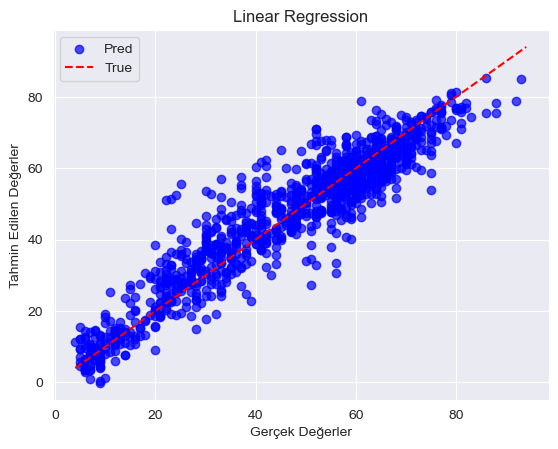

In [308]:
plt.scatter(y_test, y_predict, c='blue', label='Pred', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='True')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
title = 'Linear Regression'
plt.title(title)
plt.legend()
plt.show()

## Cross Validation

In [309]:
cv_scores = cross_val_score (model, X, y, cv =10)
cv_scores_main = np.mean(cv_scores)

cv_scores = cross_val_score (model, X, y, cv =10, scoring='neg_mean_absolute_error')
cv_scores_mean = np.mean(cv_scores)

cv_scores_mse = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores_mse_mean = np.mean(cv_scores_mse)

cv_scores_rmse = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
cv_scores_rmse_mean = np.mean(cv_scores_rmse)

print('R^2 Score: ' , cv_scores_main)
print('RMSE : ' , -cv_scores_rmse_mean)
print('MAE : ' , -cv_scores_mean)
print('MSE : ' , -cv_scores_mse_mean)

R^2 Score:  0.8824714782392805
RMSE :  6.781100963266235
MAE :  5.111196106822375
MSE :  46.069948629305344


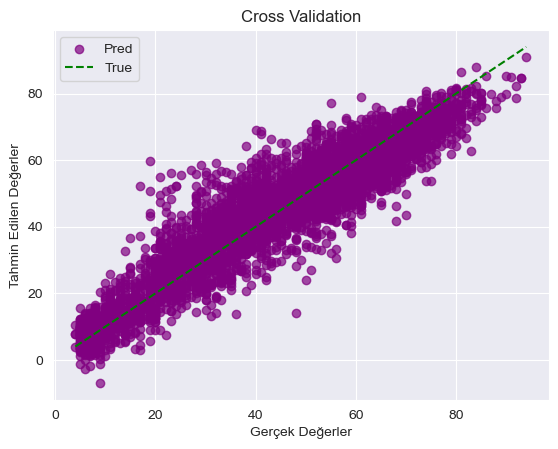

In [310]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

y_cv_predict = cross_val_predict(model, X, y, cv=10)

# Scatter plot'u oluşturalım
plt.scatter(y, y_cv_predict, c='purple', label='Pred', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='green', label='True')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
title = 'Cross Validation'
plt.title(title)
plt.legend()
plt.show()

## Grid Search

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

parameters = {'fit_intercept': (True,False), 'copy_X': (True,False), 'positive':(True,False)}

scoring_functions = {
    'R^2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

grid_search = GridSearchCV(model, parameters, scoring=scoring_functions, cv=10, refit='R^2')

grid_search.fit(X, y)

print("Best R^2 Score:", grid_search.best_score_)
print("Best MSE:", grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_])
print("Best MAE:", grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_])
print("Best RMSE:", np.sqrt(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

best_model = grid_search.best_estimator_
y_cv_predict = cross_val_predict(best_model, X, y, cv=10)

Best R^2 Score: 0.8824714782392805
Best MSE: 46.069948629305344
Best MAE: 5.111196106822375
Best RMSE: 6.787484705640621


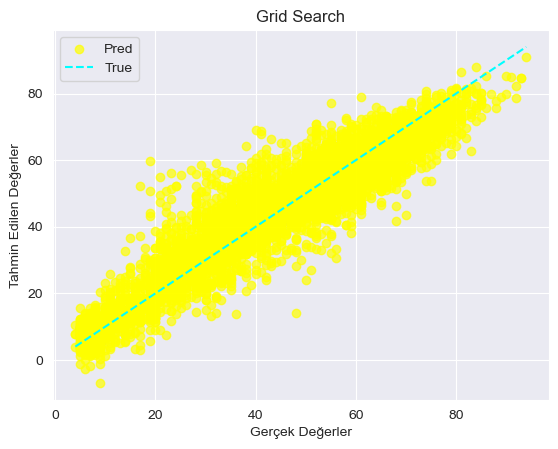

In [312]:
# Scatter plot'u oluşturalım
plt.scatter(y, y_cv_predict, c='yellow', label='Pred', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='cyan', label='True')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
title = 'Grid Search'
plt.title(title)
plt.legend()
plt.show()

# 2. BÖLÜM

In [313]:
df

,ball_control,dribbling,reactions,vision,crossing,short_pass,long_pass,stamina,strength,balance,sprint_speed,heading,shot_power,finishing,long_shots
0,55,43,68,30,33,64,49,55,86,40,52,64,54,30,31
1,69,70,70,64,60,63,63,87,81,42,67,54,60,64,68
2,25,12,65,49,14,35,18,38,68,41,48,17,51,14,20
3,46,48,64,29,44,58,53,73,82,56,63,67,32,24,33
4,14,8,50,38,11,23,20,28,64,24,31,13,48,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,86,88,92,84,80,84,77,87,76,91,89,59,82,92,84
5678,86,88,91,84,78,84,71,85,72,88,86,84,83,85,78
5679,94,95,88,90,83,85,81,79,52,82,86,63,79,83,81
5680,87,81,90,76,78,78,70,70,75,67,82,89,93,91,88


In [314]:
# Belirli sütunları çıkartma
drop_column = ['long_pass','short_pass','crossing','vision'] 
new_df = df.drop(columns=drop_column)
new_df

,ball_control,dribbling,reactions,stamina,strength,balance,sprint_speed,heading,shot_power,finishing,long_shots
0,55,43,68,55,86,40,52,64,54,30,31
1,69,70,70,87,81,42,67,54,60,64,68
2,25,12,65,38,68,41,48,17,51,14,20
3,46,48,64,73,82,56,63,67,32,24,33
4,14,8,50,28,64,24,31,13,48,4,6
...,...,...,...,...,...,...,...,...,...,...,...
5677,86,88,92,87,76,91,89,59,82,92,84
5678,86,88,91,85,72,88,86,84,83,85,78
5679,94,95,88,79,52,82,86,63,79,83,81
5680,87,81,90,70,75,67,82,89,93,91,88


In [315]:
new_y = new_df['finishing']
new_X = new_df.drop('finishing', axis=1)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y, test_size=0.20, random_state=12345)

In [317]:
model = LinearRegression()

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

parameters = {'fit_intercept': (True,False), 'copy_X': (True,False), 'positive':(True,False)}

scoring_functions = {
    'R^2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
}

grid_search = GridSearchCV(model, parameters, scoring=scoring_functions, cv=10, refit='R^2')

grid_search.fit(new_X, new_y)

print("Best R^2 Score:", grid_search.best_score_)
print("Best MSE:", grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_])
print("Best MAE:", grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_])
print("Best RMSE:", np.sqrt(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))

best_model = grid_search.best_estimator_
y_cv_predict = cross_val_predict(best_model, new_X, new_y, cv=10)

Best R^2 Score: 0.8572249307764249
Best MSE: 55.9538587910384
Best MAE: 5.643006502603319
Best RMSE: 7.480231199036457


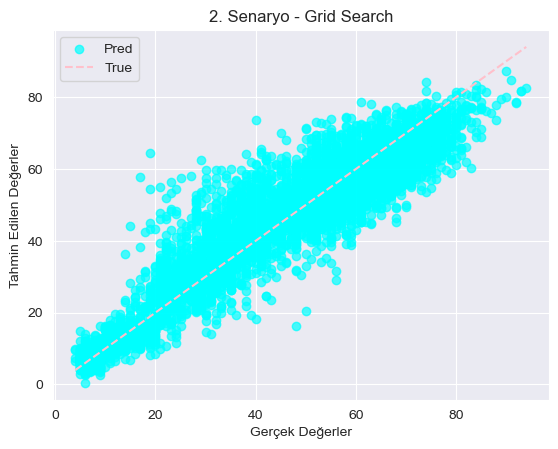

In [321]:
# Scatter plot'u oluşturalım
plt.scatter(new_y, y_cv_predict, c='cyan', label='Pred', alpha=0.7)
plt.plot([min(new_y), max(new_y)], [min(new_y), max(new_y)], linestyle='--', color='pink', label='True')
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
title = '2. Senaryo - Grid Search'
plt.title(title)
plt.legend()
plt.show()